In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import InputLayer,Normalization,Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy
from google.colab import drive

In [ ]:
dataset,dataset_info=tfds.load("malaria",with_info=True,split=['train[:80%]','train[80%:90%]','train[90%:]'],shuffle_files=True)

In [ ]:
train_dataset=dataset[0]
val_dataset=dataset[1]
test_dataset=dataset[2]

In [ ]:
print(len(val_dataset))

2756


In [ ]:
for i in val_dataset.take(1):
  print(i)

{'image': <tf.Tensor: shape=(232, 229, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}


In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [ ]:
def get_label(label):
  if label==0:
    return "Parasitized"
  else:
    return "Uninfected"

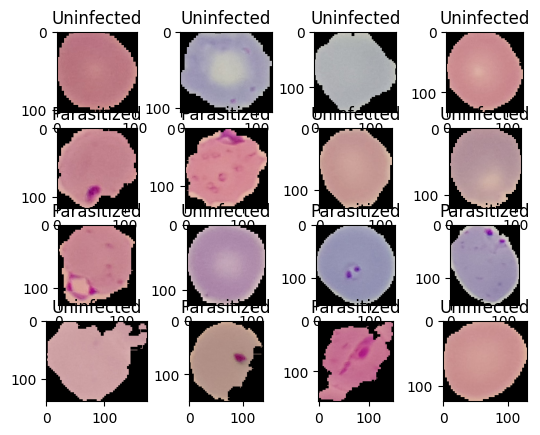

In [ ]:
for i,sample in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4,4,i+1)
  plt.imshow(sample['image'])
  plt.title(get_label(sample['label'].numpy()))

In [ ]:
img_size=224
def resize_rescale(inputs):
  return tf.image.resize(inputs['image'],(img_size,img_size))/255,inputs['label']

In [ ]:
train=train_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val=val_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test=test_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
for image,label in test.take(1):
  print(image,label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [ ]:
np.unique(image)

array([0.0000000e+00, 3.8872047e-05, 3.9450093e-05, ..., 9.2144871e-01,
       9.2191833e-01, 9.2587167e-01], dtype=float32)

In [ ]:
y_true=[0.0,0.0,0.0,0.0]
y_pred=[0.3,0.2,0.4,0.1]
bce=BinaryCrossentropy()
print(bce(y_true,y_pred))

tf.Tensor(0.299001, shape=(), dtype=float32)


#Model Creation

In [ ]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(224,224,3)),
    Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    BatchNormalization(),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    BatchNormalization(),
    Flatten(),
    Dense(100,activation='relu'),
    BatchNormalization(),
    Dense(10,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 6)       24        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                        

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=BinaryAccuracy()
    )

In [ ]:
history=model.fit(
    train,
    validation_data=val,
    epochs=5,
    verbose=1
)

Epoch 1/5
689/689 [==============================] - 73s 106ms/step - loss: 0.1861 - binary_accuracy: 0.9365 - val_loss: 0.3389 - val_binary_accuracy: 0.9035
Epoch 2/5
689/689 [==============================] - 73s 106ms/step - loss: 0.1689 - binary_accuracy: 0.9442 - val_loss: 0.2211 - val_binary_accuracy: 0.9398
Epoch 3/5
689/689 [==============================] - 72s 104ms/step - loss: 0.1703 - binary_accuracy: 0.9429 - val_loss: 0.2783 - val_binary_accuracy: 0.9394
Epoch 4/5
689/689 [==============================] - 70s 102ms/step - loss: 0.1519 - binary_accuracy: 0.9506 - val_loss: 0.2503 - val_binary_accuracy: 0.9176
Epoch 5/5
689/689 [==============================] - 71s 102ms/step - loss: 0.1437 - binary_accuracy: 0.9519 - val_loss: 1.0762 - val_binary_accuracy: 0.5232


In [ ]:
print(history.history)

{'loss': [0.18605488538742065, 0.168859601020813, 0.1702684611082077, 0.15186510980129242, 0.14374594390392303], 'binary_accuracy': [0.9365417957305908, 0.9441621899604797, 0.9429374933242798, 0.9506033062934875, 0.9519187211990356], 'val_loss': [0.33891335129737854, 0.22112910449504852, 0.2783401310443878, 0.25032278895378113, 1.0761524438858032], 'val_binary_accuracy': [0.9034833312034607, 0.9397677779197693, 0.9394049644470215, 0.9176342487335205, 0.5232220888137817]}


<function matplotlib.pyplot.show(close=None, block=None)>

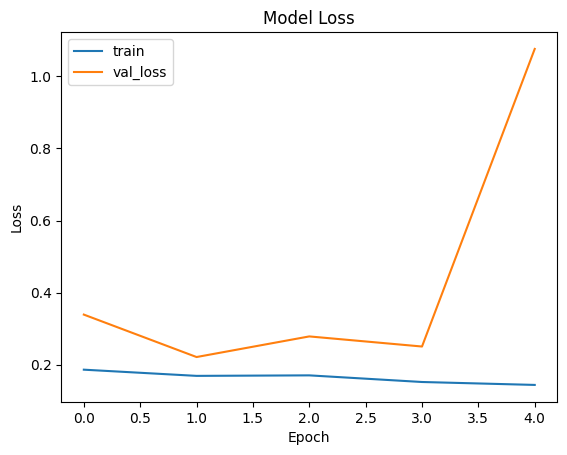

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train",'val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

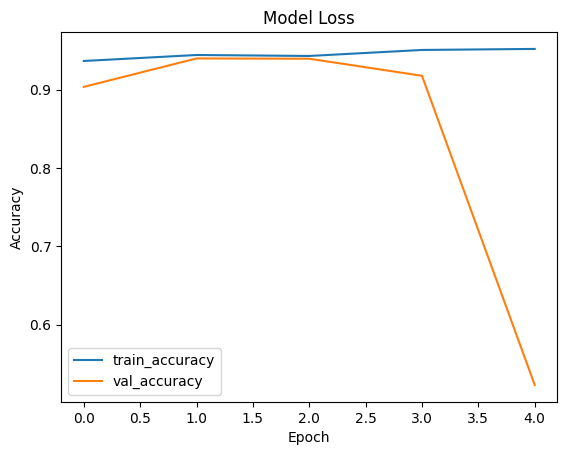

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train_accuracy",'val_accuracy'])
plt.show

In [ ]:
model.load_weights("LenetModel/variables/variables")
model.evaluate(test)

87/87 [==============================] - 2s 18ms/step - loss: 8.7284 - binary_accuracy: 0.9325


[8.728376388549805, 0.9325109124183655]

In [ ]:
def parasite_or_not(x):
  if x<0.5:
    return str('P')
  else:
    return str('U')

In [ ]:
out=parasite_or_not(model.predict(test.take(1))[0])
print(out)

1/1 [==============================] - 0s 218ms/step
U


In [ ]:
# model.save('LenetModel')

In [ ]:
# lenet_model=tf.keras.models.load_model('LenetModel')
# lenet_model.summary()

In [ ]:
# lenet_model.load_weights("weights/lenet_weights")
# lenet_model.evaluate(test)

In [ ]:
# model.save("lenet.hdf5")

In [ ]:
# l=tf.keras.models.load_model("lenet.hdf5")
# l.summary()
# l.evaluate(test)
# l.evaluate(test)
# lenet_model.save_weights("weights/lenet_weights")

1/1 [==============================] - 0s 55ms/step


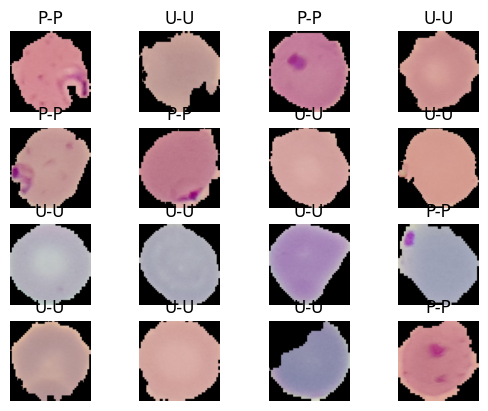

In [ ]:
for image,label in test.take(1):
  for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(image[i])
    plt.title(parasite_or_not(label.numpy()[i])+"-"+parasite_or_not(model.predict(image)[i][0]))
    plt.axis('off')

In [ ]:
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp -r /content/LenetModel/ /content/drive/MyDrive/lenet_model/

In [ ]:
# !cp -r /content/drive/MyDrive/lenet_model/ /content/LenetModel/